In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#model knowledge development about SSIE 523 Materials

In [3]:
n = 30
def initialize():
    global x, a, s, resultx, resulta, results
    x = 0.05 #Residual knowledge before starting class
    a = 1 #attention.
    s = 0.05
    resultx = [x]
    resulta = [a]
    results = [s]
    
def observe():
    global x, a, s, resultx, resulta, results
    resultx.append(x)
    resulta.append(a)
    results.append(s)
    
def update():
    global x, a, s, resultx, resulta, results
    #Knowledge increaes by 100/30
    #x += 1/n
    #x *= 1.1
    #Increaes exponetially.
    #x = x + 1/n * np.random.uniform(0.15, 1.05)
    # Decay in attention
    nx = x + a * (1/n) * (1-s) * np.random.uniform(0.05, 1.95)
    na = a - x * a + 0.1 * s
    ns = s + 0.1 * s
    x, a, s = nx, na, ns

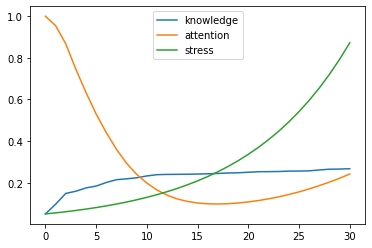

In [4]:
initialize()
for i in range(0, n):
    update()
    observe()
plt.plot(resultx, label = 'knowledge')
plt.plot(resulta, label='attention')
plt.plot(results, label='stress')
plt.legend()
plt.show()

In [5]:
def model(resid, attn, stress, sparam, itr, lnoise, unoise):
    result_resid = [resid]
    result_attn = [attn]
    result_stress = [stress]
    
    noise = np.random.uniform(lnoise, unoise)
    
    for _ in range(0, itr):
        nx = result_resid[-1] + result_attn[-1] * (1/itr) * (1-result_stress[-1]) * noise
        na = result_attn[-1] - result_resid[-1] * result_attn[-1] + sparam * result_stress[-1]
        ns = result_stress[-1] + sparam * result_stress[-1]
        
        result_resid.append(nx)
        result_attn.append(na)
        result_stress.append(ns)
        
    result = {}
    
    result['learning'] = result_resid
    result['attention'] = result_attn
    result['stress'] = result_stress
    
    return result

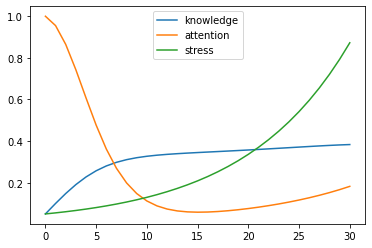

In [10]:
run = model(resid=0.05, attn=1, stress=0.05, sparam=0.1, itr=30, lnoise=0.05, unoise=1.95)
plt.plot(run['learning'], label = 'knowledge')
plt.plot(run['attention'], label='attention')
plt.plot(run['stress'], label='stress')
plt.legend()
plt.show()